/home/oel/.venv/jupy3/lib/python3.11/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


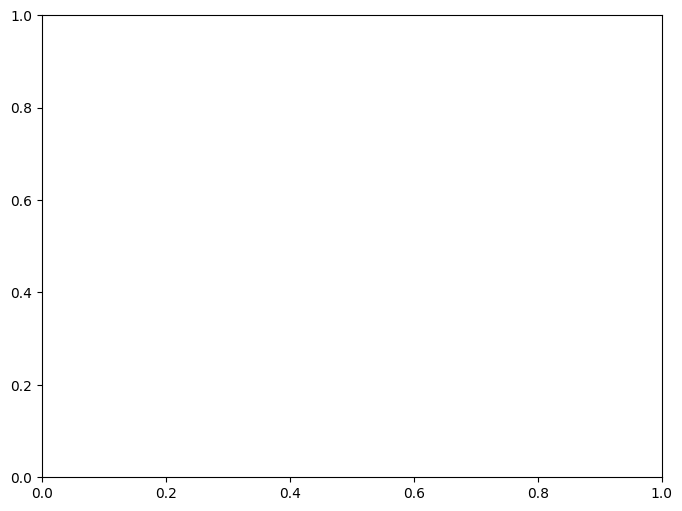

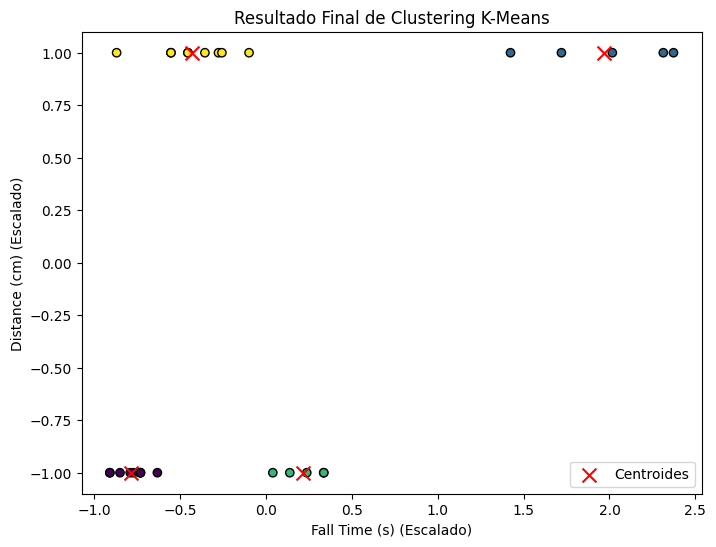

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar datos
tsv_path = "./fall_data.tsv"
df = pd.read_csv(tsv_path, sep="\t")
features = df[["Fall Time (s)", "Distance (cm)"]]

# Escalar datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Configuración de K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=20, init="random")

# Configurar figura para animación
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

# Función de animación
def update(frame):
    kmeans.partial_fit(features_scaled)
    labels = kmeans.predict(features_scaled)
    centers = kmeans.cluster_centers_

    ax.clear()
    for i in range(n_clusters):
        cluster_points = features_scaled[labels == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], edgecolors="k", label=f"Cluster {i}")

    ax.scatter(centers[:, 0], centers[:, 1], color="red", marker="x", s=100, label="Centroides")
    ax.set_title(f"K-Means Iteración {frame+1}")
    ax.set_xlabel("Fall Time (s) (Escalado)")
    ax.set_ylabel("Distance (cm) (Escalado)")
    ax.legend()

anim = animation.FuncAnimation(fig, update, frames=10, repeat=False)
plt.show()

# Graficar resultado final
plt.figure(figsize=(8, 6))
kmeans.fit(features_scaled)
df["Cluster"] = kmeans.predict(features_scaled)
scatter = plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df["Cluster"], cmap="viridis", edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="x", s=100, label="Centroides")
plt.xlabel("Fall Time (s) (Escalado)")
plt.ylabel("Distance (cm) (Escalado)")
plt.title("Resultado Final de Clustering K-Means")
plt.legend()
plt.show()